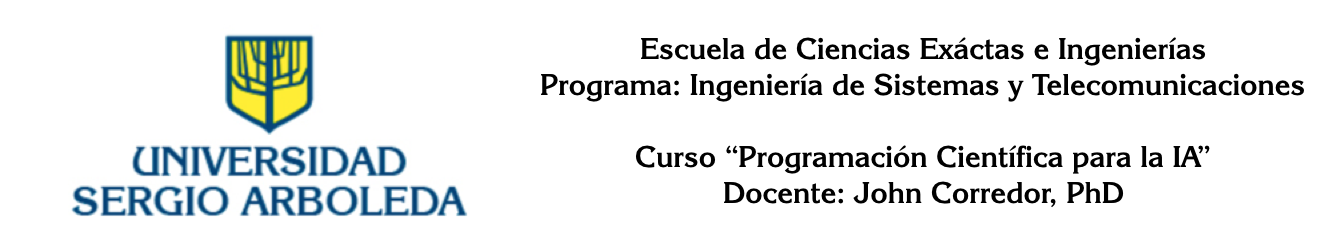

**Universidad Sergio Arboleda**

*Programa Ciencias de la Computación e Inteligencia Artificial*

*Autor: Daniel Velasquez*

*Fecha: Noviembre 2022*

*Tópico: Parcial 3*

# 1. **Objetivos**

## 1.1 Objetivo General

Modelar las predicciones basadas en la Regresión Lineal.

## 1.2 Objetivos Especificos

* Seleccionar un dataset.
* Hacer una análitica de datos sobre el dataset seleccionado.
* Modelar usando la regresión lineal usando: Python, Scikit-Learn.
* Modelar usando la regresión lineal usando: C++.
* Comparar los modelos.

# 2. **Procesamiento de Datos y Analisis de los datos**

In [ ]:
#Se importan las bibliotecas requeridas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Se carga el dataset en un objeto pandas "Dataframe"
url = '/content/diabetes.csv'
#Asignamos una estructura dataframe al archivo csv que cargamos
df = pd.read_csv(url)
#Visualizamos el dataset cargado
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print("Numero de filas: ", len(df))
print("Numero de columnas: ", len(df.columns))

Numero de filas:  768
Numero de columnas:  9


Analisis:
* Visualizamos los datos del csv, aquellos son los datos con los cuales vamos a crear el modelo de regresion lineal.
* El dataset a trabajar es acerca de la diabetes, este es un dataset originario del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. Donde el objetivo se basa en predecir diagnosticamente si una paciente tiene diabetes o no, esto basado en medidas de diagnosticos medicos relacionados en el dataset. Este dataset cuenta con la restriccion de que todos los pacientes son mujeres.
* Del conjunto de datos, se identifican varias variables independientes (varias variables medicas predictoras) y una variable dependiente ("Outcome" que es el resultado, dado en terminos de 1 y 0, es decir, tiene o no tiene diabetes correspondientemente).
* Las variables corresponden a lo siguiente: 
  * Pregnancies (Embarazos): Para expresar el número de embarazos de la pacientes.
  * Glucose (Glucosa): Para expresar el número de glucosa en la sangre.
  * BloodPressure (Presion arterial): Para expresar la medida de la presión arterial.
  * SkinThickness (Grosor de la piel): Para expresar el grosor de la piel.
  * Insulin (Insulina): Para expresar el nivel de insulina en la sangre.
  * BMI (Indice de masa corporal): Para expresar el indice de masa corporal.
  * DiabetesPedigreeFunction (Función de pedigri de diabetes): Para expresar el la funcion que califica la probabilidad de diabetes basandose en antecedentes familiares.
  * Age (Edad): Para expresar la edad de la paciente.
  * Outcome (Resultado): Para expresar el resultado final, donde 1 es "si tiene diabetes" y 0 es "no tiene diabetes".
* El dataset a trabajar tiene 9 columnas y 768 filas.
* Recordemos que en nuestro modelo, la ultima columna de datos representa a los datos dependientes (a predecir), mientras que el resto de columnas son los datos independientes.
* Se establece que va a ser un modelo de regresion lineal multiple pues, es cuando se utilizan dos o más variables independientes para determinar la variable dependiente, en este caso ocho columnas de variables independientes determinan las variables dependientes de la columna nueve.
* Ecuacion de regresion lineal multiple Y= ϴ0 + ϴ1 * X1 + ϴ2 * X2 + ... + ϴn * Xn.

# 3. **Visualizacion de datos generales**

## 3.1. Informacion general del dataframe creado

Vamos a visualizar el resumen de los datos en general.

In [ ]:
#Resumir los datos presentes
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Analisis:
* Podemos observar datos como el total de datos (conteo) de cada columna, es decir, 768 valores por columna.
* Podemos obtener datos de interes como el promedio de cada columna, la desviacion estandar, el valor minimo y maximo de cada columna, etc.
* El numero de embarazos de las pacientes estudiadas van desde aquellas que no han tenido ningun embarazo hasta a aquellas que han tenido 17 embarazos.
* Los niveles de glucosa hallados van desde 0 hasta 199.
  * Un nivel debajo de 70 significa, que la paciente tiene un nivel demasiado bajo de azucar en la sangre.
  * Un nivel entre 70 y 100 significa, que la paciente se encuentra en un nivel normal de azucar en la sangre.
  * Un nivel entre 100 y 125 significa, que la paciente tiene una alteración de la glucosa o un tipo de prediabetes.
  * Un nivel superior a 126 a menudo se puede considerar que la paciente tiene diabetes.
* Los niveles de presion  arterial hallados van desde 0 hasta 122.
  * Un nivel por debajo de 120, se considera como normal.
  * Un nivel entre 120 y 130, se considera presion arterial elevada.
  * Un nivel superior a 130, se considera como hipertension.
* Los niveles de grosor de la piel van desde 0 hasta 99, donde a medida que aumenta el valor significa que más aumenta el grosor de la piel.
  * Se considera normal un espesor entre 12 y 23 mm.
* Los niveles de insulina van desde 0 hasta 846.
  * Un nivel por debajo de 140 significa, que la paciente tiene un nivel normal de insulina.
  * Un nivel entre 140 y 199 significa, que la paciente tiene resistencia a la insulina.
  * Un nivel por encima de 200 a menudo se puede considerar que la paciente tiene diabetes.
* Los niveles de BMI van desde 0 hasta 67.
  * Un nivel por debajo de 18.5 se considera bajo de peso.
  * Un nivel por entre 18.5 y 24.9 se considera normal.
  * Un nivel por entre 25.0 y 29.9 se considera sobrepeso.
  * Un nivel superior de 30 se considera obesidad.
* Los niveles de Función de pedigri de diabetes van desde 0.078 hasta 2.42.
  * Entre más alto el nivel, más alta la probabilidade de padecer diabetes dados los antecedentes clinicos de los familiares de las pacientes.
* Las pacientes estudiadas, tienen un rango de edad llendo desde los 21 años hasta los 81 años.
* El resultado se da en terminos de 0 y 1, como se menciono anteriormente.

Vamos a visualizar informacion general sobre el dataframe creado, como tipo de dato y numero de datos no null.

In [ ]:
#Se requiere informacion general sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Analisis:
* Con esta información conocemos que hay 768 datos (no null) por columna, hay ocho columnas que hacen referencia a los valores independientes y una columna que hace referencia a los valores dependientes.
* Los tipos de datos de las columnas se reparten entre int y float, afirmando que todos los valores presentes son de tipo numerico.

Vamos a visualizar si hay datos nulos en el dataset.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Analisis:
* Se puede afirmar que no hay datos nulos en el dataset cargado, no hay necesidad de limpiar datos nulos.

Vamos a visualizar los datos que estan determinados en la columna de variable dependiente y la cantidad de cada valor.

In [ ]:
print(df["Outcome"].value_counts())
df["Outcome"].unique().tolist()

0    500
1    268
Name: Outcome, dtype: int64


[1, 0]

Analisis: 
* Podemos afirmar que los valores dados en la variable de resultado estan dados ya sea en 0 o 1.
* Determinamos que el valor de 1 determina que si presenta diabetes, mientras que 0 determina que no presenta diabetes.
* Podemos observar que los pacientes con diabetes son 268.
* Podemos observar que los pacientes sin diabetes son 500.
* Podemos determinar que el numero de pacientes con diabetes se encuentra menos presente que los pacientes sin diabetes.
* Hay mas pacientes sin diabetes que pacientes con diabetes.

## 3.2. Promedios y desviaciones

Vamos a hallar los promedios por columnas del dataframe.

In [ ]:
#Promedio por columnas
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

Vamos a hallar las desviaciones estandar por columnas del dataframe.

In [ ]:
#Desviacion estandar por columnas
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

# 4. **Graficas visuales**

## 4.1 Graficas de conteo de datos

Vamos a visualizar el conteo y el comportamiento de los datos por columnas de forma visual por medio de varias graficas de barras.

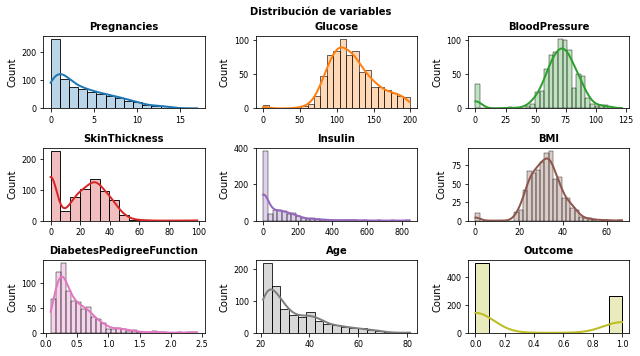

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
   
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de variables', fontsize = 10, fontweight = "bold");

## 4.2 Graficas de las columnas X vs columna Y 

Vamos a realizar varias graficas de cada columna de variables independientes con respecto a la columna de las variables dependientes.

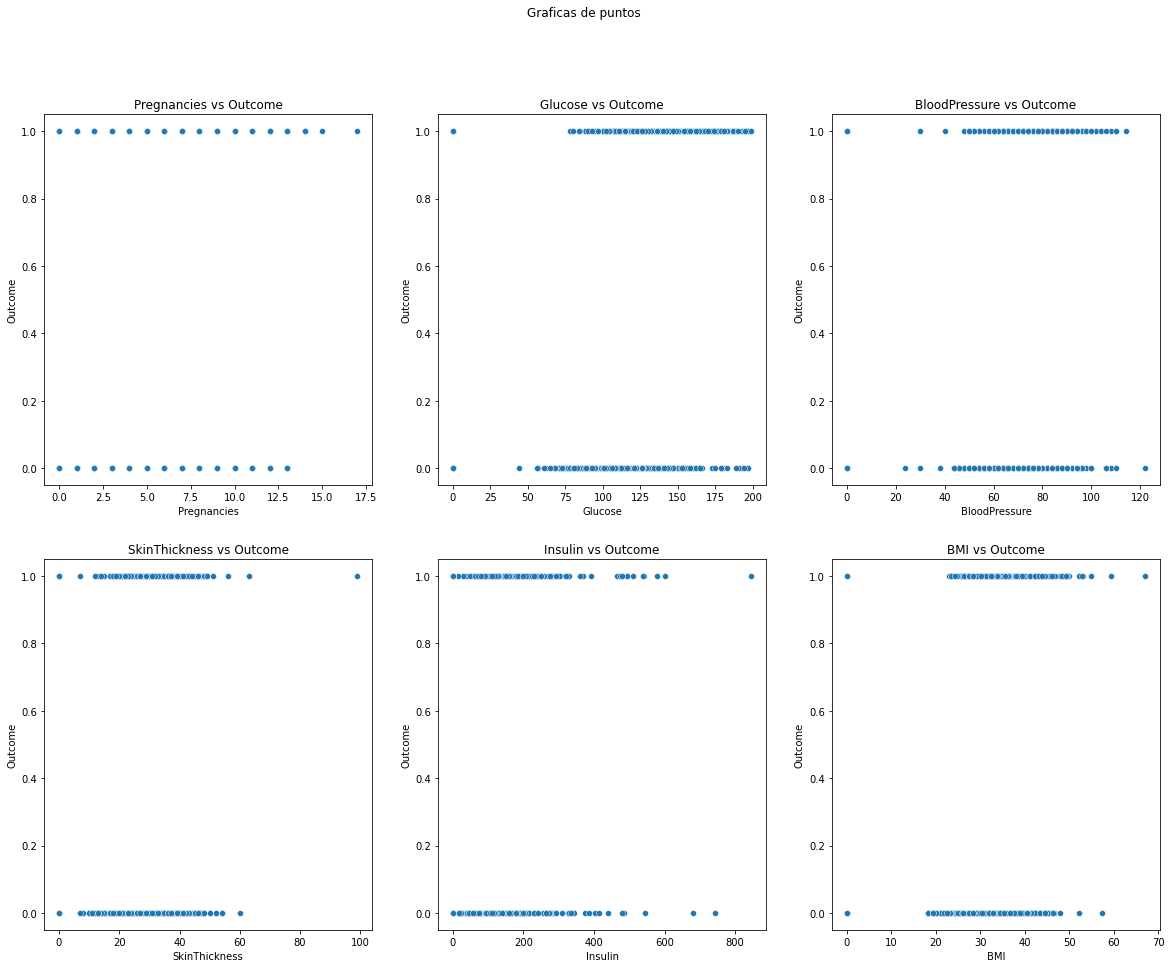

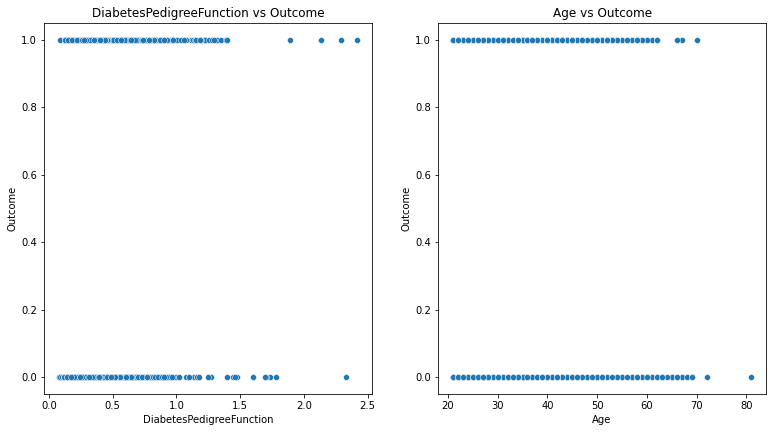

In [ ]:
#Se grafican cada variable independiente con la variable dependiente
fig1 = plt.figure(figsize = (20,15))
fig1.subplots_adjust(hspace=0.2, wspace=0.2)
fig1.suptitle('Graficas de puntos')

fig2 = plt.figure(figsize = (20,15))
fig2.subplots_adjust(hspace=0.2, wspace=0.2)

axes = fig1.add_subplot(231)
sns.scatterplot(data = df, 
               x = 'Pregnancies',
               y = 'Outcome',
               ax = axes)
axes.set_title('Pregnancies vs Outcome')

axes = fig1.add_subplot(232)
sns.scatterplot(data = df, 
               x = 'Glucose',
               y = 'Outcome',
               ax = axes)
axes.set_title('Glucose vs Outcome')

axes = fig1.add_subplot(233)
sns.scatterplot(data = df, 
               x = 'BloodPressure',
               y = 'Outcome',
               ax = axes)
axes.set_title('BloodPressure vs Outcome')

axes = fig1.add_subplot(234)
sns.scatterplot(data = df, 
               x = 'SkinThickness',
               y = 'Outcome',
               ax = axes)
axes.set_title('SkinThickness vs Outcome')

axes = fig1.add_subplot(235)
sns.scatterplot(data = df, 
               x = 'Insulin',
               y = 'Outcome',
               ax = axes)
axes.set_title('Insulin vs Outcome')

axes = fig1.add_subplot(236)
sns.scatterplot(data = df, 
               x = 'BMI',
               y = 'Outcome',
               ax = axes)
axes.set_title('BMI vs Outcome')

axes = fig2.add_subplot(231)
sns.scatterplot(data = df, 
               x = 'DiabetesPedigreeFunction',
               y = 'Outcome',
               ax = axes)
axes.set_title('DiabetesPedigreeFunction vs Outcome')

axes = fig2.add_subplot(232)
sns.scatterplot(data = df, 
               x = 'Age',
               y = 'Outcome',
               ax = axes)
axes.set_title('Age vs Outcome')

plt.show()

Analisis:
* Se pueden observar los comportamientos de cada variable independiente con respecto a la variable dependiente.
* Muchas de estas graficas muestran un comportamiento similar en su forma visual.

## 4.3 Grafica unificada

Vamos a graficar en una sola grafica los datos contenidos en el dataframe df, con el fin de verificar la relación entre las variables de forma visual. En el eje X estaran los datos independientes y en el eje Y estaran los datos dependientes.

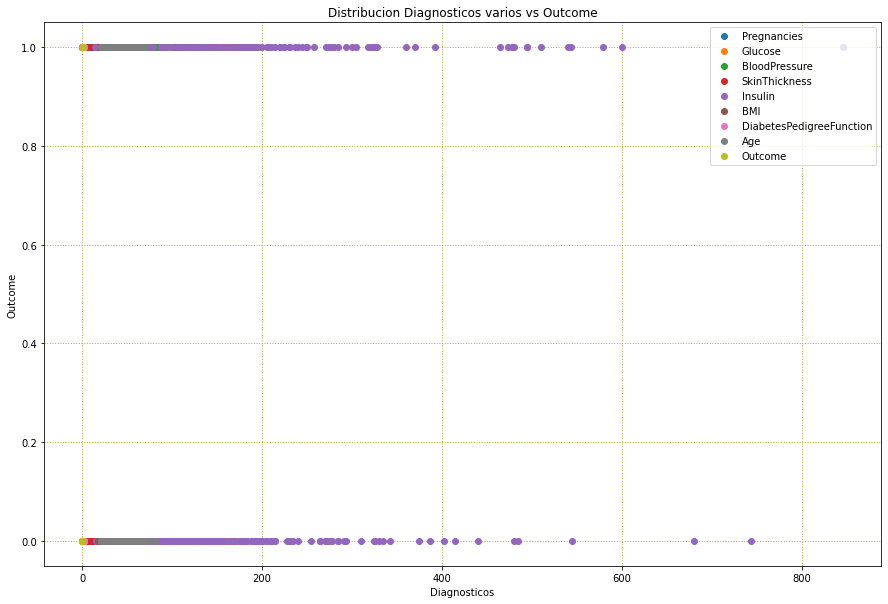

In [ ]:
plt.figure(figsize=(15,10))
for i in df.columns:
  plt.plot(df[i], df["Outcome"], "o", label=i)
plt.xlabel("Diagnosticos")
plt.ylabel("Outcome")
plt.title("Distribucion Diagnosticos varios vs Outcome")
plt.legend(loc = "upper right")
plt.grid(color='y', linestyle='dotted', linewidth=1)
plt.show()

Analisis:
* Se establecen las relaciones de los valores independientes con los valores dependientes de forma visual.
* Existen una serie de datos atipicos que se salen del rango normal de los valores independientes, haciendo referencia a aquellos datos ubicados entre los rangos 600 y 800.
* Los valores dependientes se ubican en el rango de 0 y 1, manejando datos enteros.
* Se puede determinar visualmente que el valor de 0 (no tiene diabetes) tiene mayor cantidad y concentracion de valores relacionados.

## 4.4 Grafica de correlacion

Vamos a visualizar en la siguiente grafica de mapa de calor, la correlacion existente entre variables del dataframe.

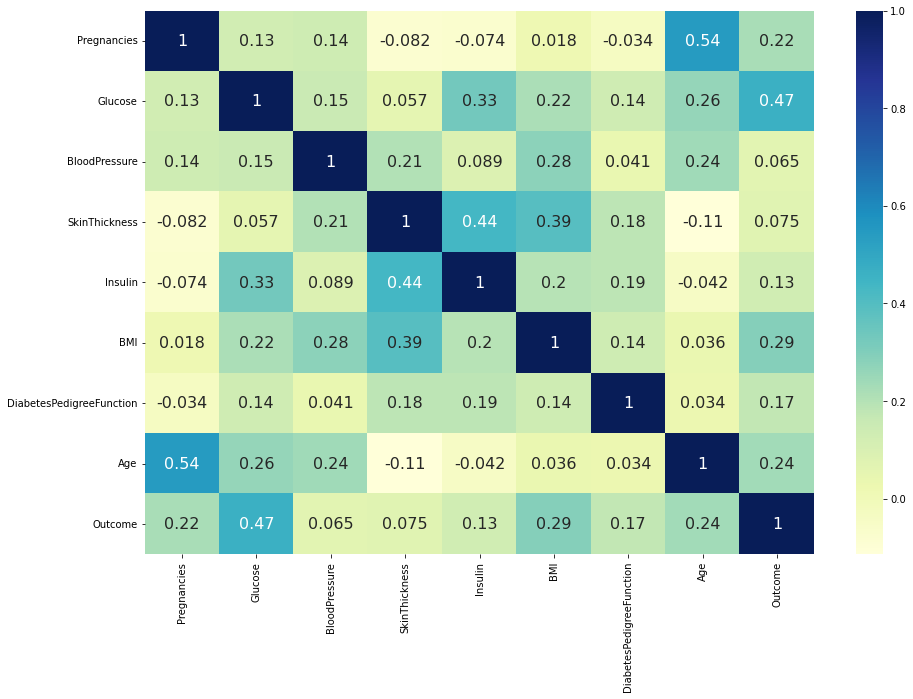

In [ ]:
plt.figure(figsize=(15, 10))
plt.rc({'size': '18'})
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":16})

Analisis:
* Podemos confirmar visualmente que la variable de diagnosticar Glucosa tiene mayor influencia con respecto a la variable de resultado (Outcome).
* Se puede decir que la variable de presion arterial (BloodPressure) es aquella que menos influencia tiene con respecto a la variable de resultado (Outcome).
* Casi todas las relaciones son en terminos de numeros positivos lo que deja ver las relaciones positivas entre las variables.

# 5. **Modelo con scikit-learn**

## 5.1 Importacion de las bibliotecas

Se importan las bibliotecas de sklearn necesarias, como linear_model (de la cual vamos a definir el creador del modelo de regresion lineal), model_selection (de la cual vamos a usar la biblioteca train_test_split para generar los datos de entrenamiento y de test) y metrics (de la cual vamos a usar la biblioteca mean_squared_error para hallar el error del modelo de test).

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
# ->  model_selection.train_test_split
from sklearn import metrics
# -> metrics.mean_squared_error

## 5.2 Division de datos train y test

Vamos a asignar a las variables independientes como X y a las variables dependientes como Y. Depues, vamos a dividir los datos de entrada (X, y) en grupos de X_train, X_test, t_train y y_test, usando la libreria model_selection.train_test_split. 

Dado que se va a establecer un estudio predictivo, es necesario medir la capacidad del modelo para predecir nuevos aspectos, para esto, se requiere dividir los datos de entrada, en grupos para el entrenamiento del modelo y para su posterior test.

Establecemos que el tamaño del entrenamiento es del 80% y por defecto, el tamaño de test es del 20%, con respecto al total de los datos.

In [ ]:
X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = df["Outcome"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8
                                    )

Visualizamos el tamaño numerico de los grupos de entrenamiento y de test asignados anteriormente.

In [ ]:
print("Tamaño datos de entrenamiento: ",np.size(X_train) + np.size(y_train))
print("     X_train - filas: ", len(X_train), "\n               columnas: ", len(X_train.columns))
print("     y_train - filas: ", len(y_train), "\n               columnas: ", len(y_train.shape))
print("\nTamaño datos de test: ",np.size(X_test) + np.size(y_test))
print("     X_test - filas: ", len(X_test), "\n               columnas: ", len(X_test.columns))
print("     y_test - filas: ", len(y_test), "\n               columnas: ", len(y_test.shape))
print("\nTotal datos: ", np.size(X_train) + np.size(y_train) + np.size(X_test) + np.size(y_test))

Tamaño datos de entrenamiento:  5526
     X_train - filas:  614 
               columnas:  8
     y_train - filas:  614 
               columnas:  1

Tamaño datos de test:  1386
     X_test - filas:  154 
               columnas:  8
     y_test - filas:  154 
               columnas:  1

Total datos:  6912


Analisis:
* Visualizamos el tamaño de los grupo de train y test asignados, donde conocemos que el grupo train equivale al 80% de los datos y el grupo test equivale al 20% restante.
* Vemos que el tamaño total de los datos es de 6912, que si lo dividimos en 9 (haciendo referencia a las 9 columnas que están declaradas en el dataset), nos da 768; equivalente a la cantidad de valores en cada columna.

## 5.3 Creacion del modelo

Vamos a crear el modelo de regresion lineal, usando la libreria de sklearn linear_model, nombrandolo regresion.

In [ ]:
#Crear un creador de modelos de regresion lineal, que lo vamos a llamar regresion
regresion = linear_model.LinearRegression()

## 5.4 Entrenamiento del modelo

Vamos a aplicar el metodo fit de regresion, del modelo (ecuacion), con el fin de ajustar una linea a los puntos dados, para predecir valores dado el conjunto existente. Esto lo hacemos para entrenar el modelo con los grupos de entrenamiento (X_train, y_train).

In [ ]:
#Entrenar al modelo
modelo = regresion.fit(X_train, y_train)

## 5.5 Prediccion de valores

Despues de entrenar el modelo se verifica la capacidad de prediccion del modelo usando el conjunto de test. Aplicamos el metodo predict, aplicando el conjunto de datos de X_test.

In [ ]:
predicciones = modelo.predict(X_test)
print(predicciones[0:3,])

[0.16757075 0.00455699 0.30956629]


Analisis: 
* Visualizamos los resultados arrojados por el modelo entrenado tras ser predecidos, los cuales son valores cercanos a aquellos valores dependientes de mayor proporcion visualizados anteriormente.

## 5.6 Datos del modelo

### 5.6.1 Interseccion y coeficientes

Ademas, vamos a obtener el valor de interseccion y pendientes de la regresion (los cuales son aquellos valores coeficientes o thetas).

In [ ]:
print("DATOS DEL MODELO")
print("Interseccion (b): ", modelo.intercept_)
print("Pendiente o coeficientes (m): ", modelo.coef_)  #Thetas, entre mas alto mas influecia tiene en la variable dependiente

DATOS DEL MODELO
Interseccion (b):  -0.8293494302345898
Pendiente o coeficientes (m):  [ 2.05244291e-02  6.03226564e-03 -3.44155827e-03 -3.30558290e-04
 -4.97289390e-05  1.32879310e-02  1.73389367e-01  3.51249934e-03]


Analisis:
* Podemos ver que en el eje de Y se intercepta con un valor cercano a -0.87, dejandonos saber que la linea de regresion lineal generada tiene su corte con respecto al eje Y en su zona negativa.
* Dados los coeficientes, se conoce que la variable independiente "Glucose" es aquel que influye en mayor cantidad al modelo, pues entre mayor sea este valor, mas influencia tiene con respecto a la variable dependiente.
* Es decir, se tiene que en el modelo, el nivel de glucosa tiene mayor influencia con respecto a la variable a predecir (Outcome).


### 5.6.2 Metricas de rendimiento

#### 5.6.2.1 Precision del modelo

La primera metrica de rendimiento es R² o R-Cuadrado, la cual es una medida estadística que determina que tan cerca están los datos generados por la linea de regresion el modelo creado con respecto a los datos orginales. Esta metrica, tambien es conocida como coeficiente de determinación.

In [ ]:
print("PRECISION DEL MODELO")
#print("Coeficiente de determinación R^2: ", modelo.score(X, y))
print("Coeficiente de determinación R^2: ", modelo.score(X_train, y_train)) #Entre mayor sea, mejor sera el modelo, porcentaje de efectividad (0-1)

PRECISION DEL MODELO
Coeficiente de determinación R^2:  0.3121001173650694


Analisis:
* Podemos ver que la presicion del modelo se da por un valor cercano a 0.32, es decir 32%, este representa el porcentaje de efectividad del modelo.
* Este mide la distancia entre una línea ajustada y todos los puntos de datos que están dispersos en el diagrama.
* Este número por sí solo no puede determinar si los datos están sesgados. 
* Este valor queda a discreción del analista, evaluar el significado de esta correlación, y que puede significar para futuros análisis.
* Recordemos que el coeficiente de determinación es la medida usada para cuantificar la variabilidad de un dato causada por otro dato relacionado, esta se ajusta entre 0,0 y 1,0; donde 1,0 indica un ajuste perfecto, mientras que el valor de 0,0 indica que no se logra modelar con alta precision del todo.

#### 5.6.2.2 Error cuadrático medio del test

La segunda metrica de rendimiento es RMSE o raiz del error cuadrático medio, la cual es la metrica que indica la desviación estándar de los valores residuales o errores de prediccion del modelo. Con esta metrica se mide el rango de dispersión de estos errores de prediccion.

In [ ]:
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("El error de test es: ", rmse)

El error de test es:  0.4148880713249577


Analisis:
* Se puede observar que el error arrojado por el modelo con respecto al test, es cercano al 0.41.
* Es la métrica más usada en regresión, la cual representa la operacion matematica de la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado.
* Indica el ajuste del modelo a los datos, es decir, que tan cerca están los puntos de datos originales de los valores dados por del modelo.
* Entre más bajo este valor, esto se traducira en un mejor ajuste (en el rango de 0 a 1).
* Por lo tanto, se puede determinar que el nivel de ajuste del modelo para el test no es tan bueno.

## 5.7 Grafica de las predicciones

Vamos a graficar las predicciones dadas por el modelo, primero graficamos los puntos (color rojo) del conjunto dado para test. Despues, volvemos a graficar los mismos puntos originales (color naranja).

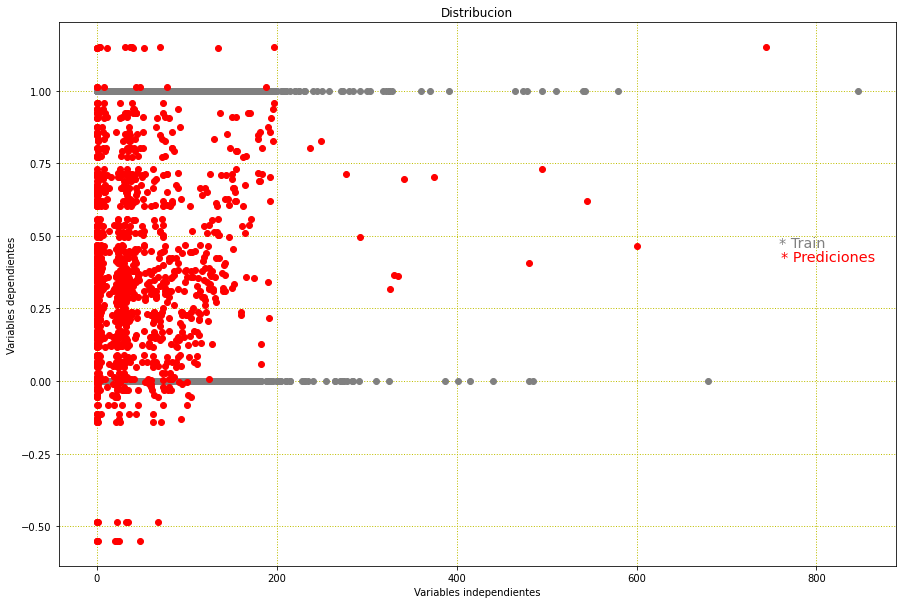

In [ ]:
plt.figure(figsize=(15,10))
#Grafica de puntos de train
for i in X_train.columns:
  plt.plot(X_train[i], y_train, "o", color="gray")

#Grafica de puntos de los datos de test y predicciones
for i in X_test.columns:
  plt.plot(X_test[i], predicciones, "o", color="red")

plt.text(810, 0.5,"* Train", ha="right", va="top", color="gray", fontsize="x-large")
plt.text(865, 0.45,"* Prediciones", ha="right", va="top", color="red", fontsize="x-large")
plt.xlabel("Variables independientes")
plt.ylabel("Variables dependientes")
plt.title("Distribucion")
#plt.legend(loc = "upper right")
plt.grid(color='y', linestyle='dotted', linewidth=1)
plt.show()

# 6. **Modelos de regresion lineal (Sklearn Python vs C++)**

Para realizar y desarrollar el modelo de regresión lineal en C++, se tomó en cuenta el desarrollo realizado durante el semestre en cuanto a estos aspectos de desarrollo de un modelo de regresión en lenguaje de programación C++.

Ahora bien, para el desarrollo del modelo de regresión lineal en C++, se uso la herramienta QT-Creator. En este entorno de desarrollo, se tomaron en cuenta diferentes clases .cpp con sus respectivos archivos headers .h, de este modo, se tomaron en cuenta las clases de extraccion de data (extractiondata), de regresion lineal (linearregression) y principal (main). En la clase extraccion de data, se establecen las funciones necesarias para el procesamiento de datos, tales como la funcion de lectura de archivos csv, la funcion que transforma los datos de un archivo csv a una estructura matriz Eigen, la funcion que haya el promedio de las columnas, la funcion que haya la desviacion estandar de las columnas, la funcion que normaliza los datos, la funcion que separa la matriz de datos en grupos de entrenamiento y de test y las funciones que toman una matriz Eigen y un vector y crean ficheros de estos. Mientras que, en la clase regresion lineal, se establecen las funciones necesarias para llevar a cabo la regresion, tales como la funcion que haya la funcion de costo, la funcion de gradiente descendiente y la funcion de metrica de rendimiento, la cual se establecio que fuera el R² Score o coeficiente de determinación, donde esta medida representa que tan correcto es nuestro modelo, además se empareja con la metrica de rendimiento elegida en el modelo de regresion lineal de Python, esto con el fin de realizar una comparacion más adelante. Y, por ultimo, en la clase principal main, se establece el orden y procedimiento necesario para llevar a cabo el desarrollo del modelo. En todas estas clases se importan las clases necesarias para su desarrollo, entre estos se tiene el uso de las herramientas de las matrices de Eigen, uso de clase vector para el uso de vectores y listas, uso de la biblioteca cmath para operaciones y transformaciones matematicas, uso de la biblioteca iostream para operaciones de entrada/salida, uso de la biblioteca fstream para crear, escribir y leer archivos, y la biblioteca Boost String Algorithms la cual es una extension a la biblioteca estandar de C++.

## 6.1 Modelo C++

### 6.1.1 Datos de entrada

Primero se recibe un fichero de entrada el cual es el archivo diabetes.csv que estamos manejando en ambos modelos (Python y C++), se especifica cual es la direccion del archivo, el delimitador de los datos (es decir ",") y si el dataset tiene cabecera o no, esto sabemos que si tiene, pues son los nombres de cada una de las columnas. Recordemos que se crea un objeto llamado "Obj_extraccion" de la clase ExtractionData para más adelante invocar sus funciones.

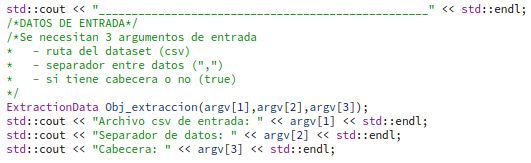

Esto anterior se declara con esta configuracion adicional en el proyecto, se establece una linea de argumentos de comandos que se asigna al ejecutar el proyecto. Donde el primer argumento es la direccion del fichero csv, el segundo argumento es el separador de datos del fichero y el ultimo argumento indica la presencia de cabecera en el fichero.

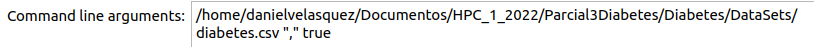

### 6.1.2 Lectura de fichero csv

Luego, se invoca la funcion LeerCSV del objeto Obj_extraccion para realizar la lectura del fichero csv y se declara el numero de filas y columnas del dataset.

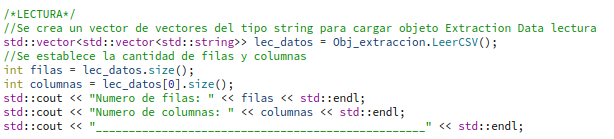

#### 6.1.2.1 Funciones usadas

Funcion LeerCSV de la clase ExtractionData

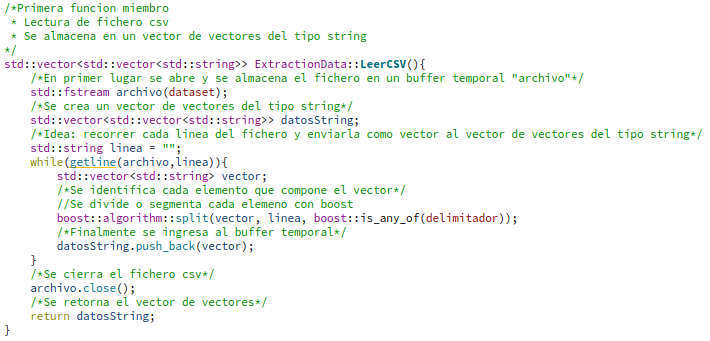

### 6.1.3 Declaracion de matriz

Luego, se declara una matriz de tipo Eigen llamada "matData" para almacenar los datos del fichero csv, esto se hace mediante la funcion CSVtoEigen del objeto Obj_extraccion.

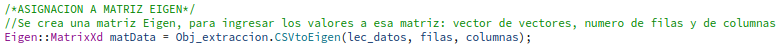

#### 6.1.3.1 Funciones usadas

Funcion CSVtoEigen de la clase ExtractionData

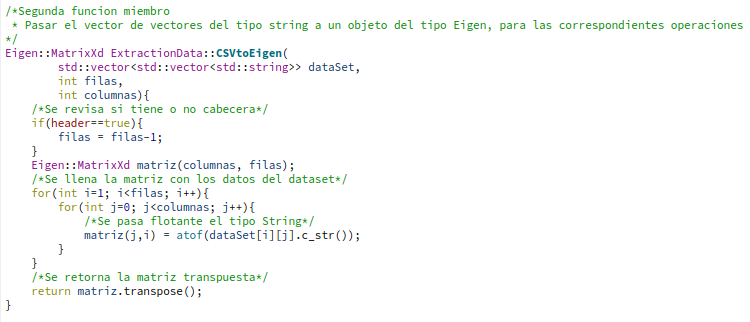

### 6.1.4 Promedio y desviacion estandar

Luego, se calculan los promedios y desviaciones estandar correspondientes a cada columna del dataset, esto mediante la invocacion de las funciones Promedio y DevStand del objeto Obj_extraccion.

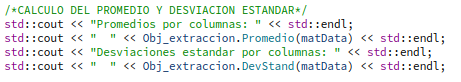

#### 6.1.4.1 Funciones usadas

Funcion Promedio de la clase ExtractionData

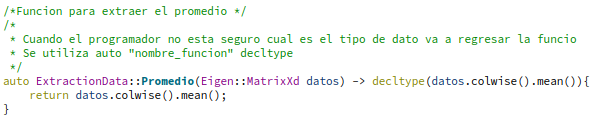

Funcion Devstand de la clase ExtractionData

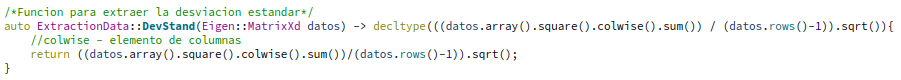

### 6.1.5 Normalizacion de datos

Luego, se normalizan los datos contenidos en la matriz matData, esto se hace mediante la funcion del objeto Obj_extraccion, los datos normalizados se almacenan en una nueva matriz llamada "normData".

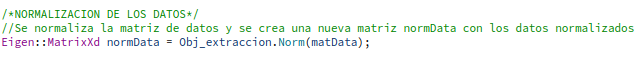

#### 6.1.5.1 Funciones usadas

Funcion Norm de la clase ExtractionData

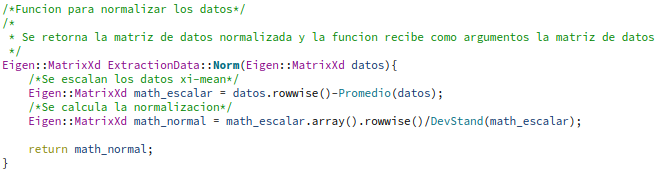

### 6.1.6 Division de datos train y test

Luego, se separan los datos en grupos de entrenamiento y de prueba. Se crean cuatro matrices de tipo Eigen llamadas "X_train", "y_train", "X_test" y "y_test". Se invoca la funcion TrainTestSplit del objeto Obj_extraccion con el fin de separar los datos contenidos en la matriz normData, esto se hace con un valor del 80% de la matriz dedicada hacia los grupos de entrenamiento (X_train y y_train) y el 20% restante dedicada hacia los grupos de prueba (X_test y y_test). Las matrices resultantes se almacenan en una tupla de datos para luego ser descomprimidos en los cuatro conjuntos requeridos (correspondientemente a los conjuntos X_train, y_train, X_test y y_test). Despues de esto, se imprimen el numero de filas y columnas de los conjuntos de entrenamiento y de prueba, para comprobar que la division de datos fue correcta.

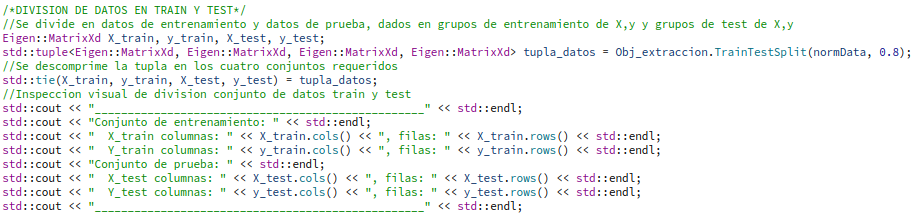

#### 6.1.6.1 Funciones usadas

Funcion TrainTestSplit de la clase ExtractionData

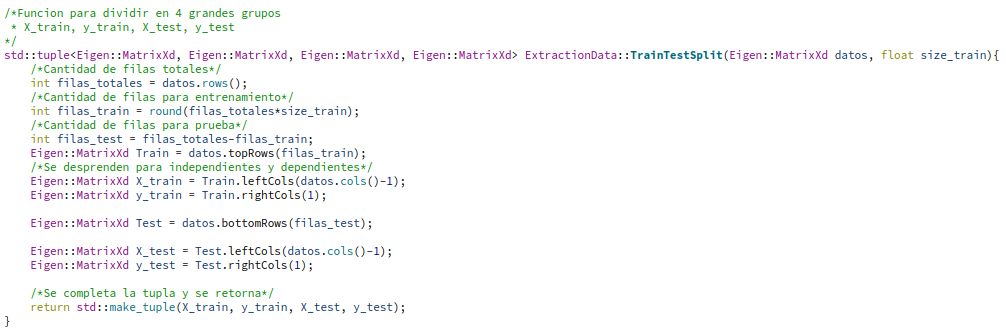

### 6.1.7 Creacion del modelo

Luego, se crea un objeto de la clase Linear Regression llamada "modeloLR", la cual nos permitira acceder a las funciones de regresion lineal mas adelante.

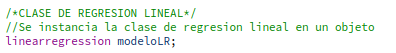

### 6.1.8 Preparacion para entrenamiento y test

Luego, se hace el proceso de asignacion de condiciones adicionales a los conjuntos de entrenamiento y de prueba, donde se redimensionan estos para contener una columna adicional de vector auxiliar lleno de unos ("1"), esto nos servira para el proceso de entrenamiento y prueba mas adelante.

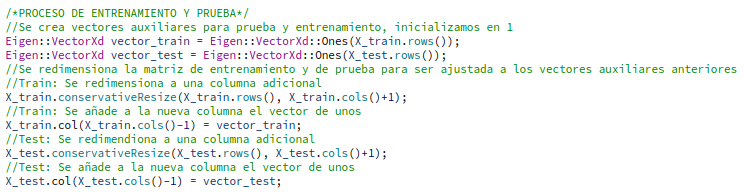

### 6.1.9 Parametros

Luego, se hace el proceso para establecer los parametros del modelo, es decir, se crea una matriz llamada "thetas" que nos servirá mas adelante para el procesamiento de los thetas del modelo, adicionalmente se declaran parametros tales como el ratio de aprendizaje y el numero de iteraciones que usara el gradiente descendiente mas adelante. Se crea otra matriz llamada "thetas_salida" para almacenar los coeficientes de las thetas mas adelante. Y, por ultimo, se crea un vector de valores tipo float para almacenar mas adelante los valores de costo.

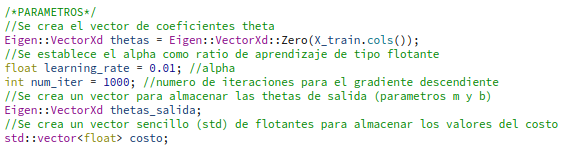

### 6.1.10 Optimizacion de parametros

Luego, se realiza el proceso de optimizacion de los parametros, se invoca la funcion GradientDescent del objeto modeloLR, donde se le mandan datos como los grupos de entrenamiento (X_train y y_test), una matriz vacia para las thetas, el ratio de aprendizaje y el numero de iteraciones. Como resultado, se da una tupla de datos llamada "gradiente", la cual cual contiene los vectores de thetas y de costo hallados por el modelo, por lo tanto, se descomprime esta tupla correspondientemente en los vectores declarados anteriormente "thetas_salida" y "costo".

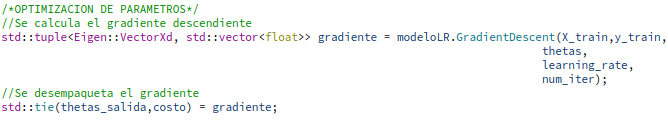

#### 6.1.10.1 Funciones usadas

Funcion GradientDescent de la clase linearregression

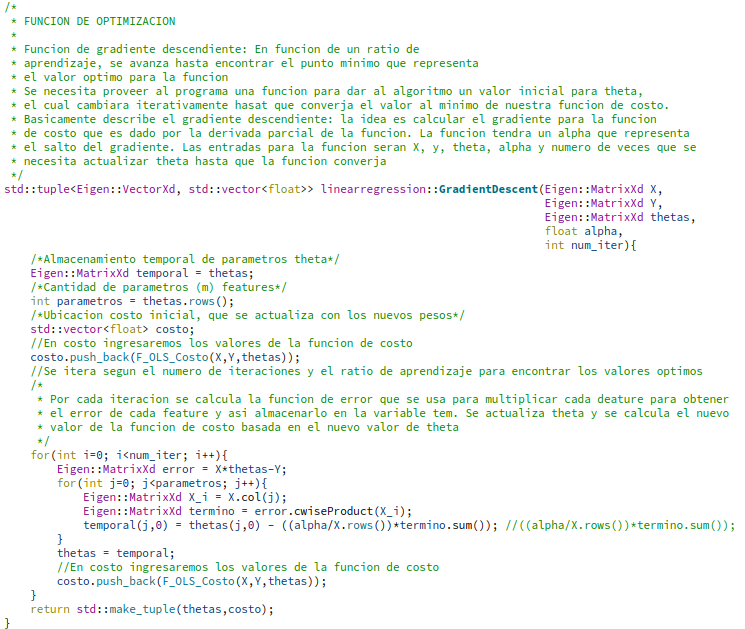

Funcion F_OLS_Costo de la clase linearregression

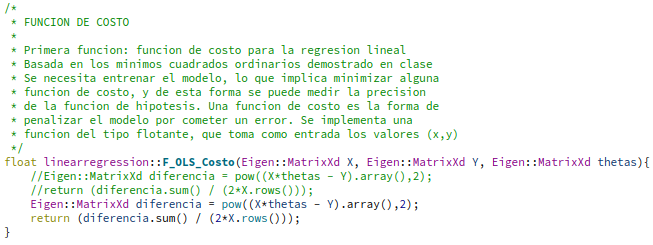

### 6.1.11 Desnormalizacion de datos, preparacion para la prediccion

Luego, se prepara lo necesario para el calculo del promedio y desviacion estandar para y_hat, ademas se desnormalizan los datos para calcular la metrica de rendimiento más adelante. Primero, se invocan las funciones VectortoFile y EigentoFile del objeto Obj_extraccion para crear los fichero de tipo txt ("costosModeloC++.txt" y "thetasModeloC++.txt") donde seran almacenados los datos de los vectores de costo y thetas_salida correspondientemente, estos ficheros quedan guardados en la carpeta Debug del proyecto. Ahora bien, se invoca la funcion Promedio del objeto Obj_extraccion para calcular el promedio de la matriz de entrada inicial matData, este valor se guarda en una variable prom_data. Despues, se escalan los datos, este paso se hace para la desnormalizacion de los datos normalizados hallando la escala de los datos originales. Despues, se invoca la funcion DevStand del objeto Obj_extraccion para calcular la desviacion estandar de los datos escalados. Y, por ultimo, se extraen los valores de las desviaciones estandar correspondientes a las variables independientes, es decir, de la columna 1 a la 8. 

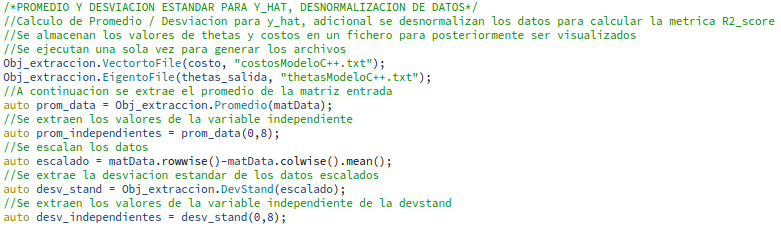

#### 6.1.11.1 Funciones usadas

Funcion VectortoFile de la clase ExtractionData

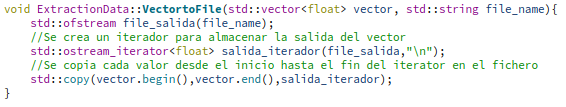

Funcion EigentoFile de la clase ExtractionData

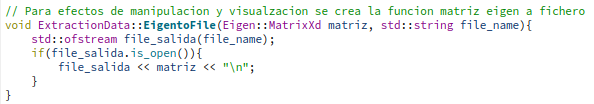

### 6.1.12 Prediccion de valores

Luego, se hace el proceso para hallar las predicciones dadas por el modelo. Primero, se crea una matriz llamada "y_train_hat" para almacenar los valores estimados de entrenamiento, esto hace referencia a los valores que el modelo puede predecir. Luego, se declara en una matriz llamada "y" los valores originales de y lo cual servira para conocer la metrica de desempeño mas adelante.

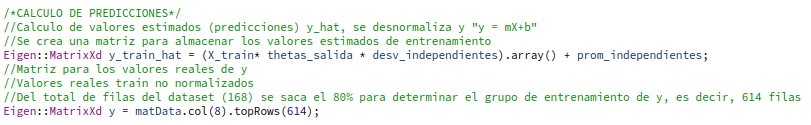

### 6.1.13 Metrica de rendimiento

Por ultimo, se hace el proceso para hallar la metrica de rendimiento del modelo. Para esto, se invoca la funcion R2_Score del objeto modeloLR, donde se le mandan la matriz de datos de y originales "y" y la matriz de predicciones hallados por el modelo "y_train_hat". Esta medida se almacena en una variable tipo float llamada "metrica_R2".

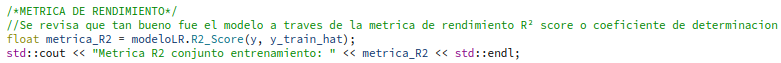

#### 6.1.13.1 Funciones usadas

Funcion R2_Score de la clase linearregression

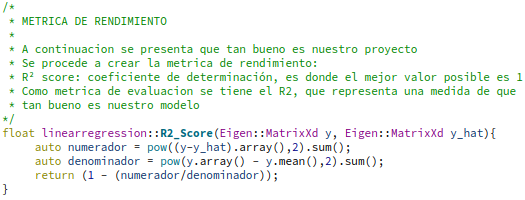

### 6.1.14 Resultado

Ahora bien, a continuacion se muestra el resultado final del modelo en C++.

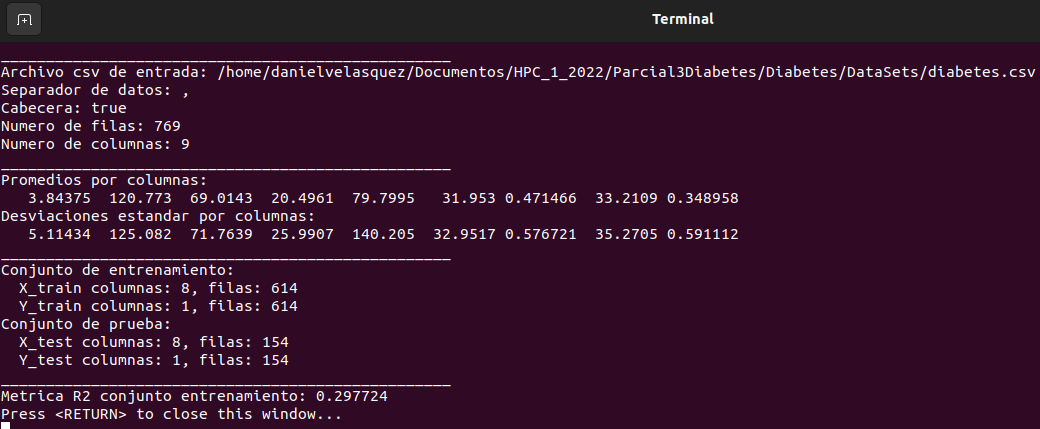

### 6.1.15 Ejecucion desde la consola

Para ejecutar el programa de modelacion de regresion lineal de C++ desde la consola de comandos, se requiere los siguientes pasos:

* Primero se debe ingresar al terminal de comandos.

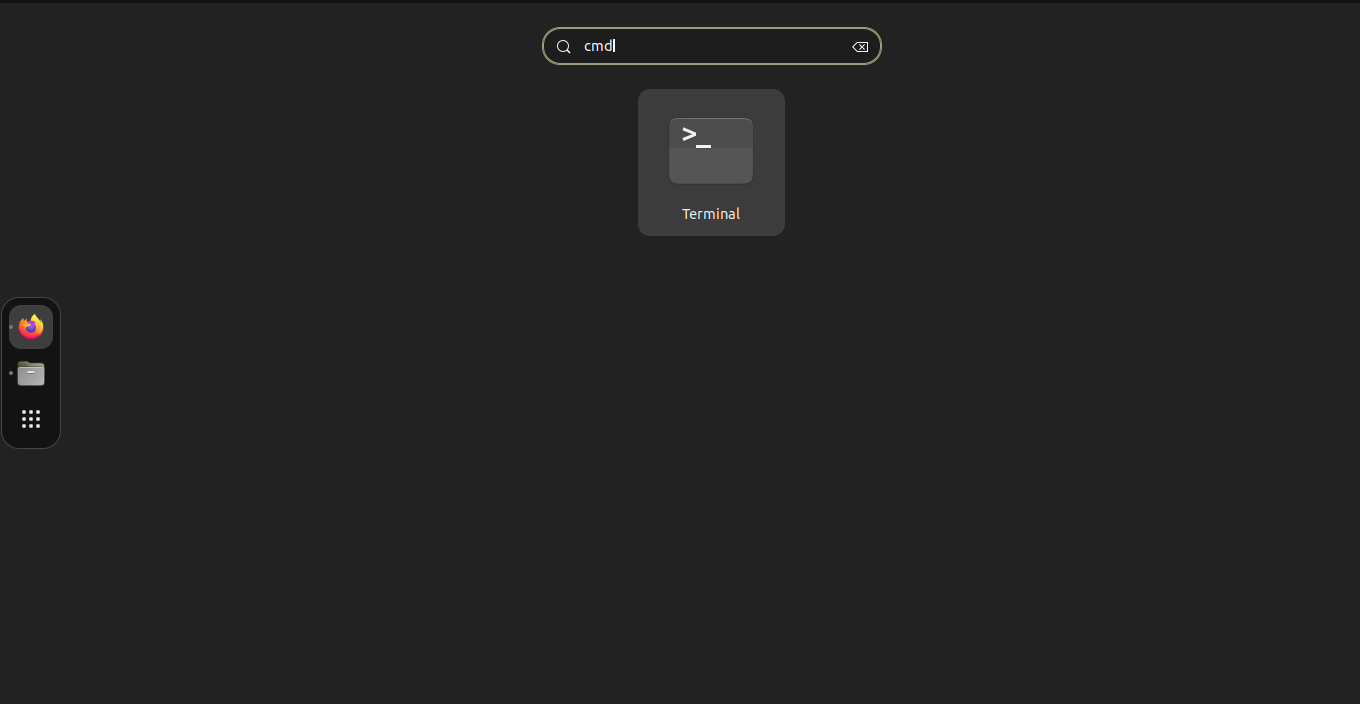

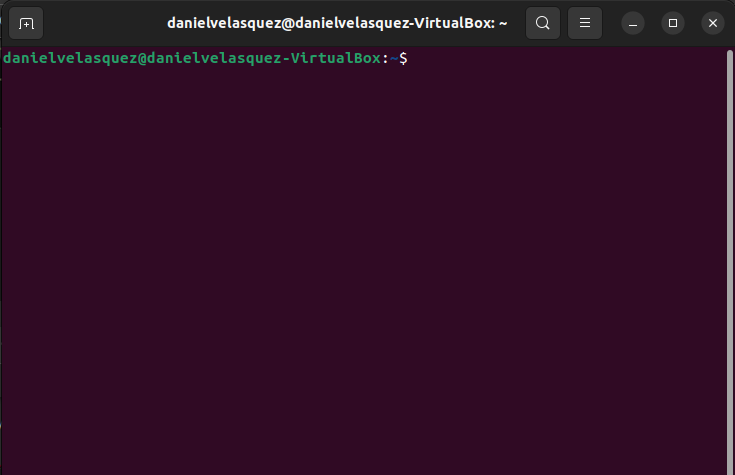

* Una vez dentro del terminal de comandos, se requiere ingresar al directorio del proyecto (Recordemos que es necesario usar el comando "cd" para ingresar a carpetas).
* Paso siguiente, visualizamos los archivos contenidos en la carpeta del proyecto (Recordemos que es necesario usar el comando "ls", para visualizar el contenidos de la carpeta).

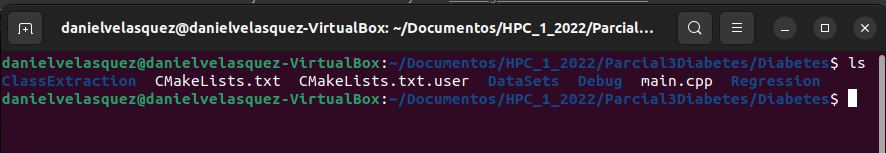

* Una vez observado el contenido de la carpeta del proyecto es necesario entrar en la carpeta Debug y visualizamos su contenido.

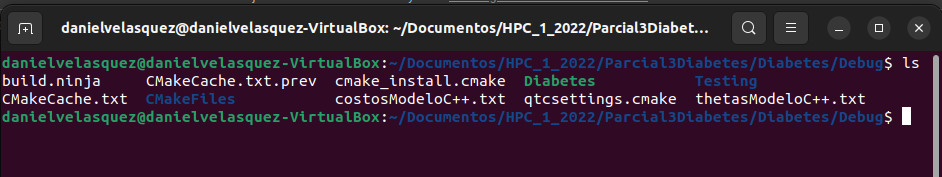

* Identificamos el archivo "Diabetes" identificado con el color verde, el cual es un archivo tipo ejecutable.
* Es necesario ejecutar el archivo ejecutable "Diabetes".
* Para lo anterior, se requiere la siguiente linea de comando: 

  ./Diabetes /home/danielvelasquez/Documentos/HPC_1_2022/Parcial3Diabetes/Diabetes/DataSets/diabetes.csv "," true
  * Donde la linea de comando se divide en cuatro partes:
    * ./Diabetes el cual es la linea necesaria para ejecutar este tipo de archivos por consola.
    * /home/danielvelasquez/Documentos/HPC_1_2022/Parcial3Diabetes/Diabetes/DataSets/diabetes.csv la cual es la direccion en el explorador de archivos del fichero csv.
    * "," la cual es la indicacion de como estan delimitados los datos dentro del csv.
    * true la cual es la indicacion de que el fichero csv contiene encabezados.

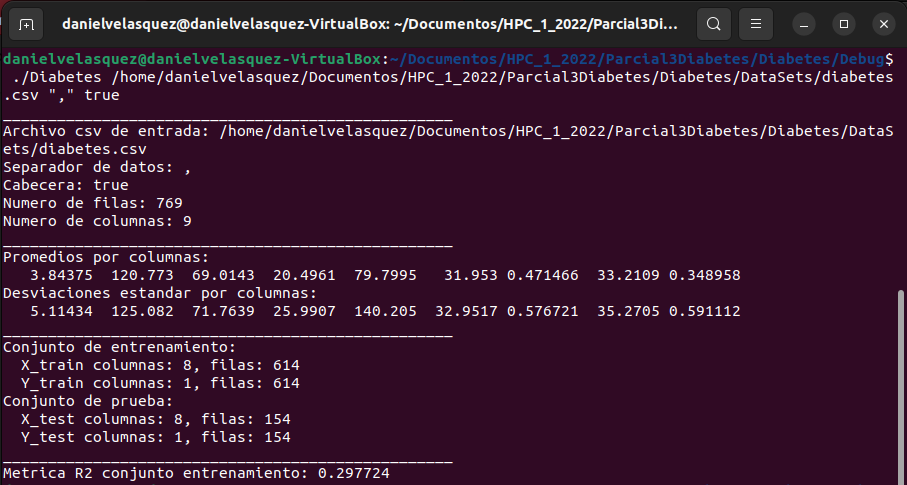

## 6.2 Comparacion de modelos

### 6.2.1 Numero de filas y columnas

Python:

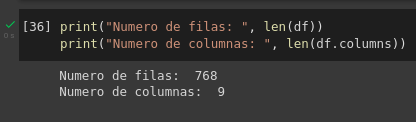

C++:

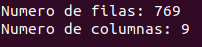

Analisis:
* Primero, se tiene que en el modelo de Python Sklearn, el programa de por si, reconoce que el dataset contiene una fila para la cabecera, por lo tanto, ya reconoce que son 768 filas de datos sin incluir la cabecera del fichero.
* Ahora bien, en el modelo de C++, al momento de reconocer el fichero, este modelo si reconoce a la cabecera como una fila extra, por lo tanto, reconoce que son 769 filas. Sin embargo, mas adelante en parte del codigo de la funcion CSVtoEigen de la clase ExtractionData se declara codigo que reconoce el argumento true (que indica la presencia de cabecera) que se envió al ejecutar el programa, por lo que se reduce el numero de filas en 1, dando que despues se reconoceran 768 filas de datos sin tomar en cuenta la primera fila del fichero, la cual corresponde a la cabecera de las columnas.
* El numero de columnas es igual en ambos modelos.

### 6.2.2 Promedios por columnas

Python:

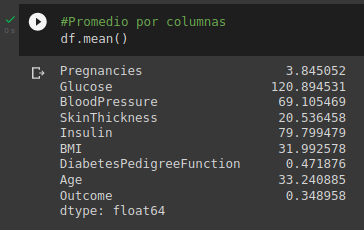

C++:

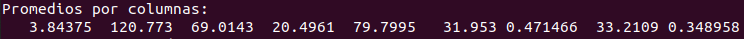

Analisis:
* Primero, realizando una comparacion numerica de los valores dados por ambos modelos, se puede decir que, ambos presentan valores muy cercanos, solo variando en terminos de decimales, centesimas o incluso en milesimas.
* Pueda que esta diferencia minima se de por la forma en la que esta estructurada la logica detras de las funciones utilizadas, como lo es "datos.colwise().mean()" en C++ y "df.mean()" en Python.
* Por lo tanto, podemos decir que ambos modelos tienen alto grado de emparejamiento en este sentido.

### 6.2.3 Desviacion por columnas

Python:

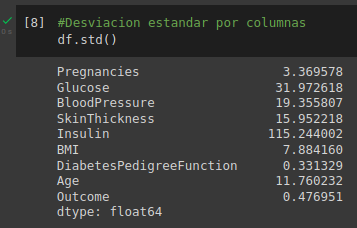

C++:

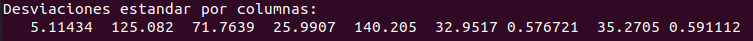

Analisis:
* A diferencia de los puntos anteriores, en este caso si se presenta una gran discrepancia de valores. Pues realizando una comparacion de valores dados en ambos modelos, se puede reconocer que los valores varian en terminos de unidades, decenas o incluso en centenas. Donde las mayores diferencias de valores los presentan las columnas "Glucose", "BloodPressure", "Insulin" y "BMI". Mientras que los valores más cercanos se dan en las columnas "Pregnancies", "DiabetesPedigreeFunction" y "Outcome".
* Se puede decir que, la razon a esta diferencia tan abrupta de valores se puede dar por la forma en la que esta estructurada la logica detras de las funciones utilizadas, como lo es "((datos.array().square().colwise().sum())/(datos.rows()-1)).sqrt()" en C++ y "df.std()" en Python.

### 6.2.4 Tamaño de conjunto de entrenamiento y de prueba

Python:

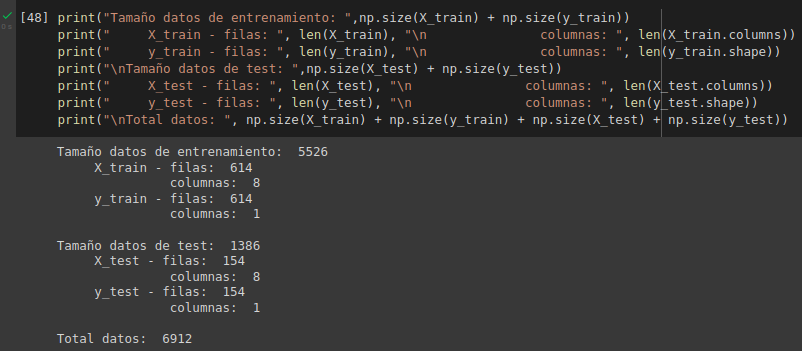

C++:

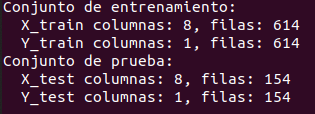

Analisis:
* Podemos observar que en ambos modelos se presenta la misma dimension de division de datos en conjuntos de entrenamiento y prueba.
* Recordemos que la division de datos se da en un 80% para entrenamiento y 20% para prueba.

### 6.2.5 Metrica de rendimiento

Python:

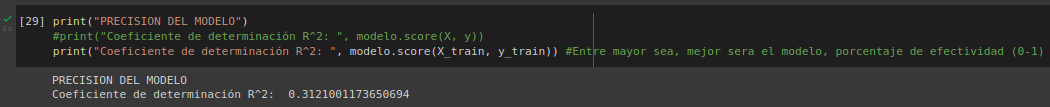

C++:

imagen.png

Analisis:
* Podemos decir que, dados las metricas de rendimiento dadas por ambos modelos se puede identificar que los valores dan muy cercanos, mas exactamente en terminos de 0.014 de variacion, la diferencia solo se da en terminos de centesimas.
* Por lo tanto, se puede decir que ambos modelos parecen tener alto grado de emparejamiento en el resultado final.
* Dados las metricas de rendimiento, se dice que ambos modelos dan un valor cercano a 0.3, es decir, del 30% de efectividad del modelo. Es decir, dado los resultados, se dice que este valor no es muy alto, indicando que los modelos no se logran modelar con alta precision. Pueda que una configuracion diferente a la regresion lineal pueda ser mas efectiva para el ajuste correcto del modelo, sin embargo, esto queda como recomendacion para los ingenieros en futuras investigaciones.

# 7. **Conclusiones**

* Seleccionar un dataset.
  * Al seleccionar un dataset por nuestra propia cuenta se puede decir que, se da cierta independencia al ingeniero al momento de determinar que dataset es el mas adecuado.
  * El ingeniero debe mostrar autonomia y autocritica al momento de elegir el dataset, pues debe tener conviccion y analizar que factores de un dataset le interesa.
  * Se tomo en cuenta el numero de datos presentes en el dataset para determinar que dataset es el adecuado, pues como requerimiento adicional o recomendacion, se necesitaba que el dataset tuviera una cantidad considerable de datos para el correcto funcionamiento de los modelos. En este caso se contaban con 768 filas y 9 columnas, dando un total de 6912 datos.
  * Como otro aspecto adicional que se tomo en cuenta al momento de determinar el dataset a usar, se puede decir que se comprobo que el dataset contuviera datos numericos (enteros y decimales), esto con fines de realizar una buena practica.
* Hacer una análitica de datos sobre el dataset seleccionado.
  * Dada la analitica de datos del dataset de diabetes, se puede decir que tras una serie de graficas y el uso de mapa de calor para revelar la relacion entre variables, se dice que el nivel de glucosa en la sangre tiene la mayor relacion con los casos de diabetes en las pacientes. Esto va de la mano con el BMI o indice de masa corporal, ambos niveles tienen gran correlacion con la presencia de diabetes en un paciente. Lo que nos puede decir que, la mayoria de los pacientes deben tener cuidado con estos aspectos para prevenir la diabetes, manteniendo bajos estos niveles.
  * Dada la analitica de datos del dataset de diabetes, se puede decir que con la grafica de correlacion, se identifica que el nivel de presion arterial y el grosor de la piel, no tienen gran incidencia en la presencia de diabetes en una paciente. Por lo tanto, la mayoria de pacientes no tienen gran preocupacion de tener diabetes con respecto a estos niveles.
  * Dada la distribucion de valores analizados con un histograma grafico, se puede decir que la mayoria de pacientes analizadas no habian tenido ningun embarazo (mas de 200 pacientes), seguidas de las pacientes que solo han tenido un embarazo (casi por la cantidad de 100 pacientes). A su vez, se declara que la mayoria de las pacientes presentan un nivel de glucosa por encima de 100, lo que indica que presentan un tipo de pre diabetes, por lo tanto, dado el estudio deberian tener cuidado con estos niveles y mantenerlos a raya para evitar la diabetes.
  * Dada la distribucion de valores analizados con un histograma grafico, se establece que la mayoria de pacientes son personas jovenes por debajo de los 40 años, teniendo mas presencia aquellas pacientes comenzando sus 20 años. Por lo tanto, es factible apuntar que la poblacion joven deben tener cuidado con las medidas observadas, pues la presencia de diabetes desde una edad tan corta puede ser preocupante.
  * Los datos del dataset con respecto a la presencia de diabetes no es tan alentador en cierto nivel pues, a pesar que mas de 400 pacientes no padecen de diabetes, se debe tomar en cuenta que mas de 200 pacientes si paceden de diabetes, lo cual indica que muchos de las pacientes deben prestar cuidadosa atencion a sus determinados niveles.
* Modelar usando la regresión lineal usando: Python, Scikit-Learn.
  * Se empleo la biblioteca sklearn de python para el desarrollo del modelo, entre las clases usadas se mencionan las clases linear_model, model_selection y metrics. 
  * Con la clase linear_model se uso para crea el modelos de regresion lineal con la funcion LinearRegression(), mas adelante, fue usado para entrenar el modelo con la funcion fit(), la cual recibe los conjuntos de entrenamiento (X_train y y_test), donde le modelo ya entrenado se llamó "modelo", este modelo más adelante fue aquel que contiene la funcion predict() para generar una lista de valores que predice el modelo en base a lo entrenado, despues, este mismo modelo contiene las funciones intercept y coef, los cuales tienen el valor de interseccion de la linea de regresion y los coeficientes o thetas generados, respectivamente. Igualmente este modelo contiene la funcion score, la cual sirvió para calcular el R² score con el fin de calificar el modelo.
  * Con la clase model_selection se uso para realizar la separacion de los grupos de entrenamiento y de prueba usando la funcion train_test_split(), la cual recibe las variables independientes, dependientes y el tamaño de entrenamiento (el cual se declaro que fuera del 0.8 o del 80%).
  * Con la clase metrics se uso para calcular el valor de RMSE o el error cuadratico medio usando la funcion mean_squared_error(), la cual recibe el grupo de valores "y" reales, el grupo de valores de "y" predecidos por el modelo y se indica que el resultado se de en un valor no escalado al cuadrado, esto con el fin de obtener valores mas adecuados con el modelo.
* Modelar usando la regresión lineal usando: C++.
  * Primero se menciona que, para la realizacion del modelo se usaron conocimientos de programacion en C++, haciendo uso de funciones matematicas y de las disponibles en Eigen.
  * Se emplearon metodos y funciones propias de la clase Eigen que se usaron para fines de manejo de las matrices implicadas, funciones como transpose() para transponer matrices, y demas. Por lo tanto, el modelo se baso en gran medida en el uso de matrices de tipo Eigen.
  * Se empleo el uso de tuplas de datos, con el fin de manejar resultados que se entregaban por medio de funciones, se aprendió de gran forma el manejo de Eigen reforzando sus posibles aplicaciones, de la mano con un refuerzo significativo de programacion en lenguaje C++.
  * Se aprendió de mejor forma el manejo de los archivos .h o headers de las clases generadas con el fin de entender correctamente como se estructuran las clases en C++.
* Comparar los modelos.
  * Se puede decir que con la modelacion de la regresion lineal con sklearn, se obtienen los resultados de forma mas lineal, es decir, no es necesario implementar de gran forma conocimientos de programacion en el lenguaje Python, esto debido a que las funciones necesarias para llevar a cabo el diseño del modelo de regresion lineal, ya vienen implementadas en la biblioteca de sklearn. Esto facilita el proceso de generar un modelo de regresion lineal, simplificando tal proceso en unos cuantos pasos.
  * Ahora bien, se reconoce que al realizar el modelo de regresion lineal en lenguaje C++, se puede considerar que el ingeniero conoce con mayor profundidad, la logica detras de las funciones necesarias para el desarrollo de la regresion. Con esto, el ingeniero conoce de mejor forma el trasfondo del proceso realizado en el modelo de sklearn.
  * Ahora bien, con el modelo de C++ se usaron diferentes funciones y el conocimiento de manejo de datos. Con esto se dice que, el ingeniero mantiene un mayor cuidado con el manejo de los datos, pues este modelo se desarrolla de forma manual, indirectamente se indica que el ingeniero debe adoptar un nivel mayor de autoridad sobre los datos y su integridad.
  * Por ultimo, se menciona que el modelo implementado con sklearn, es ideal para casos que requieran mayor precision y agilidad. Mientras que el modelo realizado en C++, puede ser ideal para casos donde el ingeniero esta en proceso de aprendizaje, donde se requiere entender la logica detras de la regresion y la importancia del manejo adecuado de datos por parte del ingeniero.

# 8. **Recomendaciones**

* Se recomienda que, como fue mencionado anteriormente, dados los resultados de los modelos desarrollados, puede ser que al usar e implementar una configuracion diferente a la regresion lineal, es posible que se encuentre una configuracion que sea mas efectiva para un ajuste correcto, incluso, es posible que una configuracion de regresion polinomial sea mas adecuada. Sin embargo, esto queda como recomendacion para los ingenieros en futuras investigaciones.

# 9. **Referencias**

* https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset 
* https://medlineplus.gov/spanish/ency/article/003482.htm 
* https://medlineplus.gov/spanish/ency/article/000468.htm
* https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
* https://www.youtube.com/watch?app=desktop&v=1CGbP0l0iqo
* https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
* https://www.youtube.com/watch?v=7j0qMSnyG9M 
* https://www.youtube.com/watch?v=kAfFxwiDvdQ
* https://www.delftstack.com/es/howto/matplotlib/how-to-show-pyplot-grid-in-matplotlib/ 
* https://es.stackoverflow.com/questions/178735/cómo-mostrar-un-conjunto-de-gráficas-en-una-misma-ventana-o-en-varias-usando-ma 
* https://appgametutoriales.com/leyenda-matplotlib-legend-matplotlib/ 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html 
* https://www.estrategiasdeinversion.com/herramientas/diccionario/fondos/r2-r-cuadrado-o-coeficiente-de-determinacion-t-1163#:~:text=reducción%20del%20riesgo.-,Interpretación%20del%20coeficiente%20de%20determinación%20o%20R2,%2C0%20y%201%2C0. 
* https://aprendeia.com/evaluando-el-error-en-los-modelos-de-regresion/ 
* https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste 
* https://docs.oracle.com/cloud/help/es/pbcs_common/PFUSU/insights_metrics_RMSE.htm
* https://cplusplus.com/reference/iostream/
* https://eigen.tuxfamily.org/dox/GettingStarted.html
* https://cplusplus.com/reference/cmath/
* https://www.javatpoint.com/cpp-files-and-streams 
* https://es.acervolima.com/biblioteca-de-algoritmos-de-string-de-refuerzo-de-c/